<a href="https://colab.research.google.com/github/natsakh/IAD/blob/main/Pr_3/3_4_PCA_eig_SVD_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
# Load and standardize Iris
iris = datasets.load_iris()
X = iris.data.astype(float)                 # shape (150, 4)
X_std = StandardScaler().fit_transform(X)   # zero-mean, unit-variance per feature
n, d = X_std.shape
print(f"Shape: n={n}, d={d}")

Shape: n=150, d=4


PCA with eigenvectors (covariance matrix method)  
(обчислюємо коваріаційну матрицю, знаходимо власні вектори та власні значення)

In [3]:
# FROM SCRATCH (covariance eigendecomposition)
#    Use the exact formula: cov = X^T X / (n-1)
cov_mat = (X_std.T @ X_std) / (n - 1)
# Since cov_mat is symmetric positive semidefinite, eigh is numerically preferable.
eigvals, eigvecs = np.linalg.eigh(cov_mat)  # eigenvalues asc, columns are eigenvectors
# Sort in DESC order to match standard PCA ordering
order = eigvals.argsort()[::-1]
eigvals = eigvals[order]
eigvecs = eigvecs[:, order]

explained_variance = eigvals
explained_variance_ratio = eigvals / eigvals.sum()

print("\n--- PCA via covariance (from scratch) ---")
print("Eigenvalues (explained variance):")
print(explained_variance)
print("Explained variance ratio:")
print(explained_variance_ratio)
print("Eigenvectors (principal axes) — columns:")
print(eigvecs)



--- PCA via covariance (from scratch) ---
Eigenvalues (explained variance):
[2.93808505 0.9201649  0.14774182 0.02085386]
Explained variance ratio:
[0.72962445 0.22850762 0.03668922 0.00517871]
Eigenvectors (principal axes) — columns:
[[-0.52106591  0.37741762  0.71956635  0.26128628]
 [ 0.26934744  0.92329566 -0.24438178 -0.12350962]
 [-0.5804131   0.02449161 -0.14212637 -0.80144925]
 [-0.56485654  0.06694199 -0.63427274  0.52359713]]


PCA with SVD (singular value decomposition)


In [4]:
U, S, Vt = np.linalg.svd(X_std, full_matrices=False)
V = Vt.T  # columns of V are right-singular vectors
print(V)
# Увага: знаки власних векторів та правих сингулярних векторів
# можуть відрізнятися (це не впливає на результат PCA)

[[ 0.52106591 -0.37741762  0.71956635  0.26128628]
 [-0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199 -0.63427274  0.52359713]]


In [5]:
#2D projection
k = 2
W = eigvecs[:, :k]            # from covariance
X_pca_from_cov = X_std @ W
print(X_pca_from_cov.shape)

(150, 2)


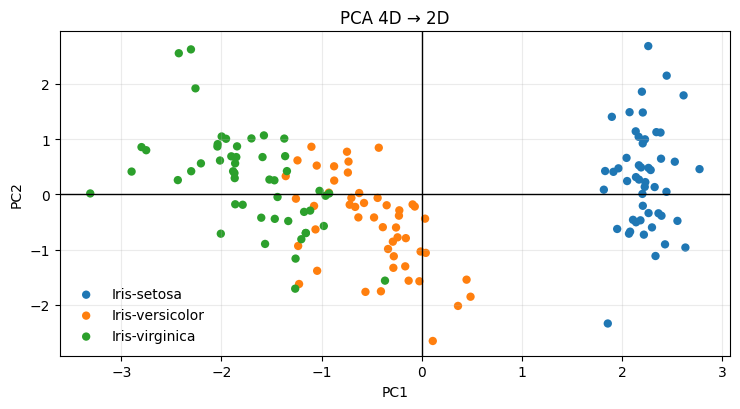

In [6]:
import matplotlib.pyplot as plt

y = iris.target                      # класи 0,1,2

pc1, pc2 = X_pca_from_cov[:, 0], X_pca_from_cov[:, 1]
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['tab:blue', 'tab:green', 'tab:orange']

plt.figure(figsize=(7.5, 4.2))
for cls, name, c in zip([0, 1, 2], species, colors):
    idx = (y == cls)
    plt.scatter(pc1[idx], pc2[idx], label=name, s=36, edgecolor='none')

# Нульові осі
plt.axhline(0, linewidth=1, color='black')
plt.axvline(0, linewidth=1, color='black')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 4D → 2D')
plt.legend(frameon=False)
plt.grid(True, alpha=0.25)
plt.tight_layout()

plt.show()


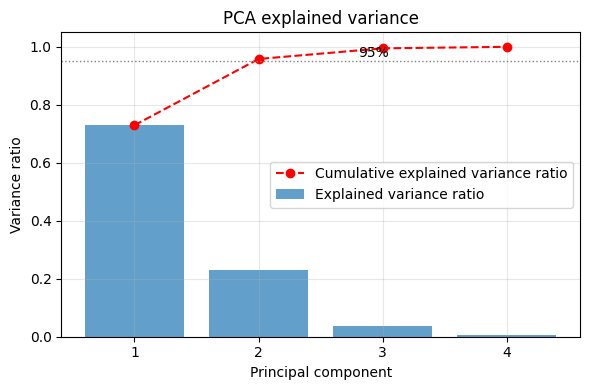

In [7]:
evr = explained_variance_ratio
cum_evr = np.cumsum(evr)

plt.figure(figsize=(6, 4))

# Стовпчики для explained variance ratio
plt.bar(range(1, len(evr) + 1), evr, alpha=0.7, label='Explained variance ratio')

# Лінія для cumulative explained variance ratio
plt.plot(range(1, len(evr) + 1), cum_evr, marker='o', color='red',
         linestyle='--', label='Cumulative explained variance ratio')

# Горизонтальна лінія для 95%
plt.axhline(0.95, linestyle=':', linewidth=1, color='gray')
plt.text(len(evr) * 0.7, 0.955, '95%', va='bottom')

plt.xticks(range(1, len(evr) + 1))
plt.xlabel('Principal component')
plt.ylabel('Variance ratio')
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('PCA explained variance')
plt.tight_layout()
plt.show()

PCA with scikit-learn

Shape після PCA: (150, 2)
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


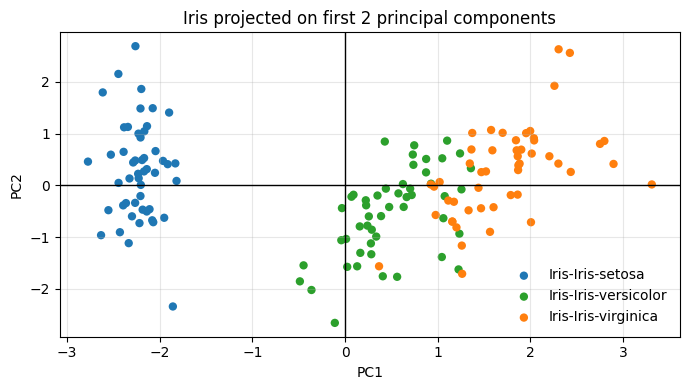

In [8]:
from sklearn.decomposition import PCA
# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)   # <-- координати у просторі головних компонент

print("Shape після PCA:", X_pca.shape)
print(pca.components_)

# Візуалізація PC1 vs PC2
colors = ['tab:blue', 'tab:green', 'tab:orange']
plt.figure(figsize=(7, 4))
for cls, name, c in zip([0, 1, 2], species, colors):
    idx = (y == cls)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Iris-{name}',
                s=36, edgecolor='none', c=c)

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris projected on first 2 principal components')
plt.legend(frameon=False)
plt.grid(True, alpha=0.3)
plt.tight_layout()